# Exploratory Data Analysis

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
# Reading the data in Data frame
dataframe=pd.read_csv(r"data/insurance.csv")

In [3]:
# Data looks like
dataframe

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


### understanding of the data 

In [4]:
# dtypes of all feature
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
# Numerical features stats
dataframe.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
# Checking dtypes and null value present in each feature
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Their is no null values are present in either of the feature

### Missing value present in each feature

In [6]:
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- We can see their is no null value is present in one of the feature

### Categorical unique values 

In [7]:
# Checking unique value present in sex  feature
dataframe["sex"].unique()

array(['female', 'male'], dtype=object)

In [8]:
# Checking unique value present in smoker  feature
dataframe["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [9]:
# Checking unique value present in children  feature
dataframe["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [10]:
# Checking unique value present in region  feature
dataframe["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Checking distribution of numerical feature

d:\Projects\A\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


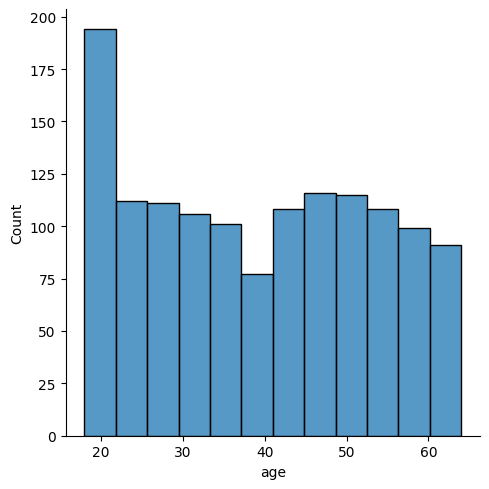

In [11]:
sns.displot(dataframe["age"])

- Distribution of age feature almost contant

d:\Projects\A\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


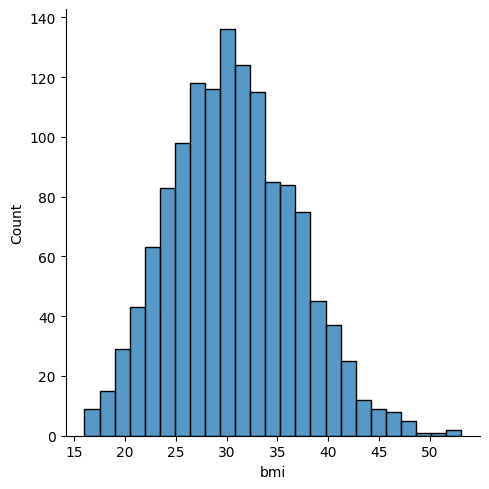

In [12]:
sns.displot(dataframe["bmi"])

- bmi feature is normally distributed

d:\Projects\A\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


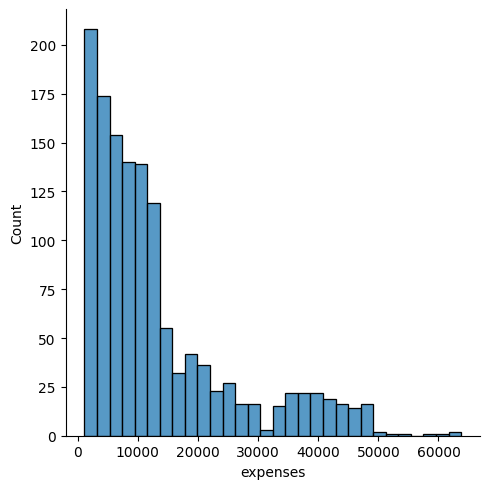

In [13]:
sns.displot(dataframe["expenses"])

- Expenses feature right skiewed

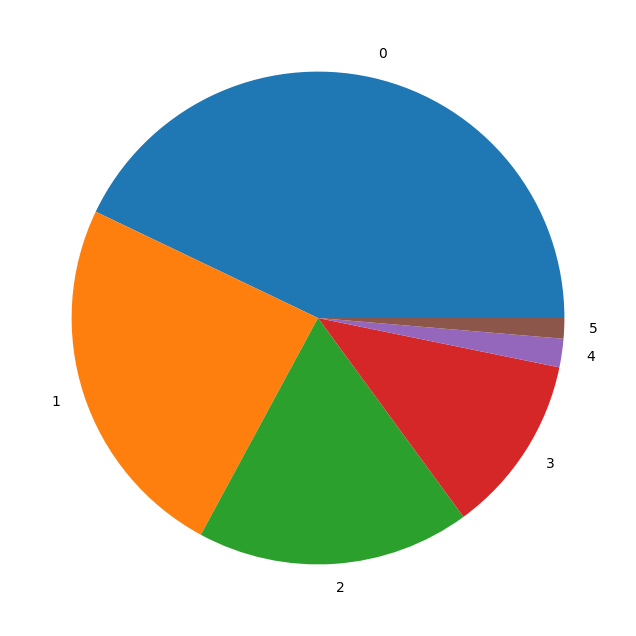

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.pie(dataframe.children.value_counts(), labels = dataframe.children.value_counts().index)
plt.show()

- We can see the children distribution 0 and 1 are most contribution

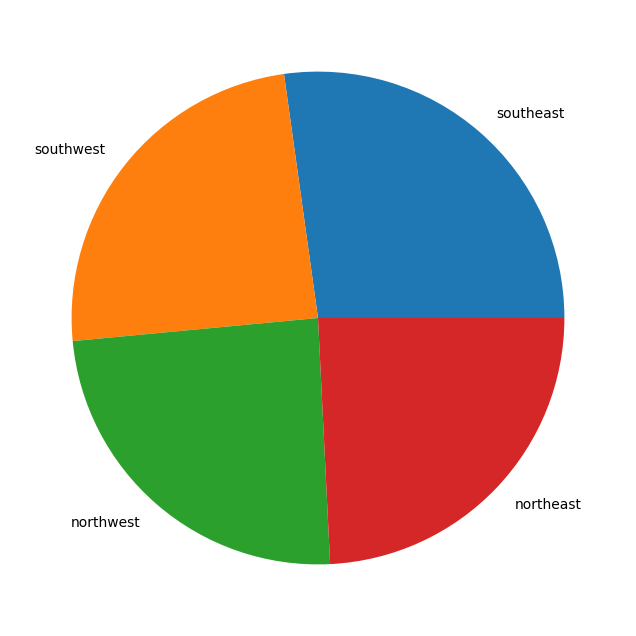

In [15]:
plt.figure(figsize=(10,8))
plt.pie(dataframe.region.value_counts(), labels = dataframe.region.value_counts().index)
plt.show()

- We can see the ditribution in all are area are almost same

### Corelationship between each feature

In [16]:
dataframe.corr()

ValueError: could not convert string to float: 'female'

- We can see the relationship between age and expenses are 0.29

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe.corr(), annot = True)

ValueError: could not convert string to float: 'female'

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

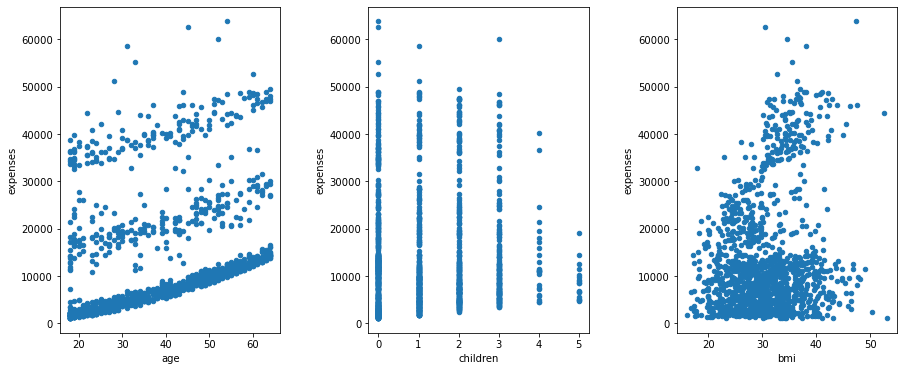

In [35]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
dataframe.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
dataframe.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
dataframe.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

<Axes: xlabel='bmi', ylabel='expenses'>

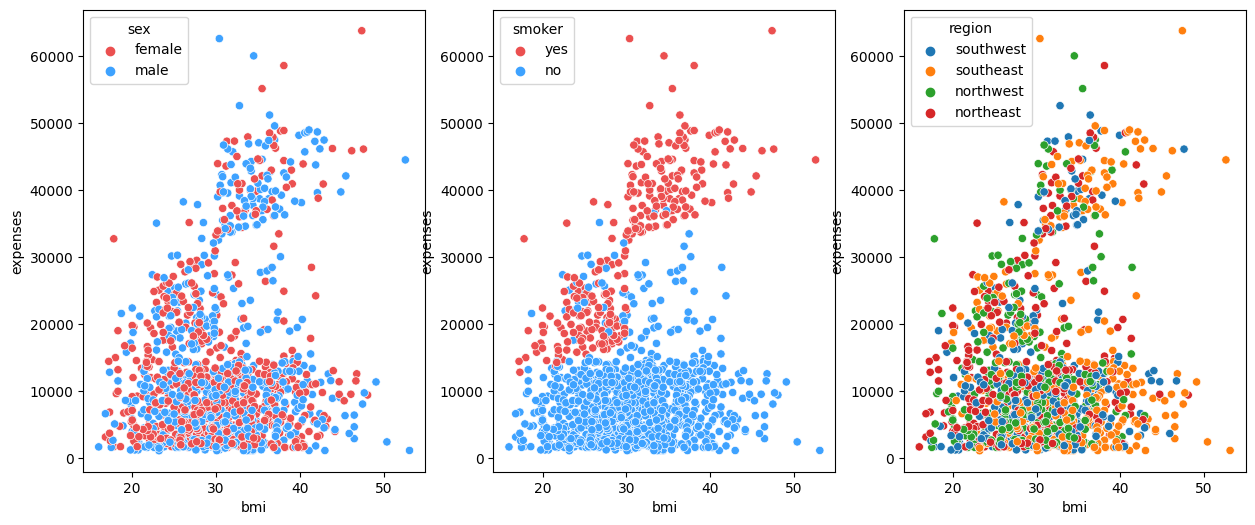

In [18]:
## here we are plotting scatterplot with x = bmi & y = expenses & relationship with hue functions on [ sex, smoker, regions].
palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=dataframe,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=dataframe,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=dataframe,hue='region')

<Axes: title={'center': 'Smoker'}, xlabel='smoker'>

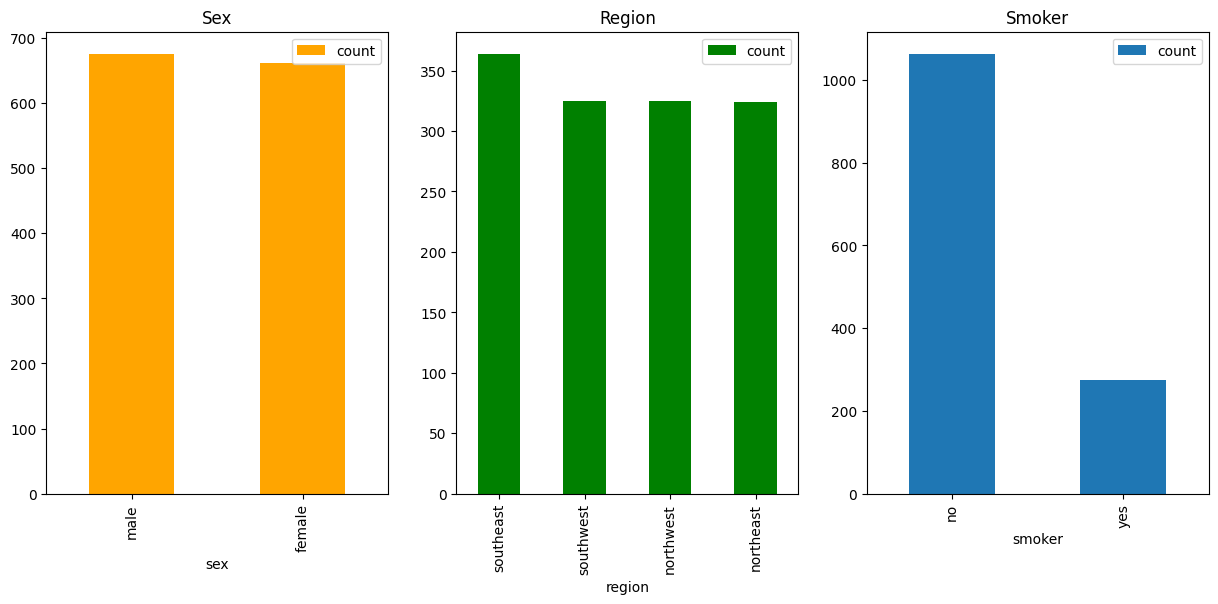

In [19]:
## Here, we are plotting count-plot realted with [ sex, region, smokers] columns respectively.
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
dataframe['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex') 
dataframe['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
dataframe['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')


In [20]:
dataframe.head(5) # sameple data 

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data preprocessing

In [21]:
categorical_feature=[]
for i in dataframe:
    if dataframe[i].dtype=="object":
        categorical_feature.append(i)

In [22]:
categorical_feature

['sex', 'smoker', 'region']

In [23]:
dataframe["sex"]=dataframe["sex"].replace(["male","female"],[1,0])
dataframe["smoker"]=dataframe["smoker"].replace(["yes","no"],[1,0])
dataframe["region"]=dataframe["region"].replace(['southwest', 'southeast', 'northwest', 'northeast'],[0,1,2,3])

In [24]:
dataframe["region"].unique()

array([0, 1, 2, 3], dtype=int64)

In [25]:
dataframe

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2,10600.55
1334,18,0,31.9,0,0,3,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,0,2007.95


## Training and Testing the data 

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import r2_score

In [27]:
x=dataframe.drop("expenses",axis=1)
y=dataframe["expenses"]

In [28]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,0
1,18,1,33.8,1,0,1
2,28,1,33.0,3,0,1
3,33,1,22.7,0,0,2
4,32,1,28.9,0,0,2
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2
1334,18,0,31.9,0,0,3
1335,18,0,36.9,0,0,1
1336,21,0,25.8,0,0,0


In [29]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

## Slipting of the data 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Appling Robust Scaler 

In [30]:
robust_scaler = RobustScaler()
x_train_scaled= robust_scaler.fit_transform(x_train)
x_test_scaled=robust_scaler.transform(x_test)

In [31]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Linear Regression": LinearRegression(),
    "XGB Regressor": XGBRegressor(), 
    "Ridge regressor" : Ridge(alpha=0.1),
    "Lasso regressor" : Lasso(alpha=0.1)
}

In [32]:
def adj_r2score(score,X,y):
    adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
    return adjR
    

In [41]:
def TrainingAndTesting_models(x_train, x_test, y_train, y_test, models):
    
    adjr2=[]
    models_list = []  
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train, y_train)

        # Make predictions
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)
        

        # Training set performance
        r2score_train=r2_score(y_train,y_train_pred)
        adj_r2score_train=adj_r2score(r2score_train,x_train,y_train)
        
        # Test set performance
        r2score_test=r2_score(y_test,y_test_pred)
        adj_r2score_test=adj_r2score(r2score_test,x_test,y_test)
        

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance  Training set')
        print('r2-score:{:.4f}'.format(r2score_train))

        print('Model performance  Test set')
        print('r2-score: {:.4f}'.format(r2score_test))
    
        
        adjr2.append(adj_r2score_test)
    
        
    report=pd.DataFrame(list(zip(models_list, adjr2 )), columns=['Model Name', 'AdjR2']).sort_values(by=["AdjR2"])
        
    return report

In [42]:
TrainingAndTesting_models(x_train, x_test, y_train, y_test,models)

Random Forest
Model performance  Training set
r2-score:0.9756
Model performance  Test set
r2-score: 0.8641
Decision Tree
Model performance  Training set
r2-score:0.9983
Model performance  Test set
r2-score: 0.7207
Linear Regression
Model performance  Training set
r2-score:0.7417
Model performance  Test set
r2-score: 0.7833
XGB Regressor
Model performance  Training set
r2-score:0.9935
Model performance  Test set
r2-score: 0.8421
Ridge regressor
Model performance  Training set
r2-score:0.7417
Model performance  Test set
r2-score: 0.7833
Lasso regressor
Model performance  Training set
r2-score:0.7417
Model performance  Test set
r2-score: 0.7833


,Model Name,AdjR2
1,Decision Tree,0.714234
4,Ridge regressor,0.778315
5,Lasso regressor,0.778338
2,Linear Regression,0.778340
3,XGB Regressor,0.838486
0,Random Forest,0.860938


- Report 
- we can see random foreest perfromimg better with adjr2 score 0.86